# CSE2530 Computational Intelligence
## Assignment 2: Artificial Neural Networks

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group   |           40          |
|------------|----------------------|
| Jacek Obiała  |        6185665       |
| Michał Szelejewski  |        6219128       |
| Marcin Łysikowski  |        6182771       |
| Adam Porat  |        6260438       |

#### Imports

In [2]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [3]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

# Splitting data into train, validation and test sets
n = len(features) # size of the input data

# sets of indices for train, validation and test data
train_idx = np.random.choice(range(n), int(n*0.7), replace=False)
val_idx = np.random.choice(list(set(range(n)) - set(train_idx)), int(n*0.15), replace=False)
test_idx = list(set(range(n)) - set(train_idx) - set(val_idx))

## 1 Questions
### 1.2 Architecture
#### Question 1:

In [4]:
# A single perceptron stores 3 values - weight, bias, learning rate (w, b, l). 
def predict(w, b, x):
    if np.dot(w, x) + b > 0:
        return 1
    else:
        return 0
        
def train(w, b, l, x, y, epochs):
    errors = []
    for i in range(epochs):
        error_per_epoch = 0
        for j in range(len(x)):
            predicted = predict(w, b, x[j])
            error = y[j] - predicted
            w += l * error * np.array(x[j]) # update params
            b += l * error # update params
            error_per_epoch += abs(error)
        errors.append(error_per_epoch)
    return w, b, errors

points = ([[0, 0],[0, 1],[1, 0],[1, 1]])
AND = [0, 0, 0, 1]
OR = [0, 1, 1, 1]
XOR = [0, 1, 1, 0]

OR
[0, 0], 0
[0, 1], 1
[1, 0], 1
[1, 1], 1


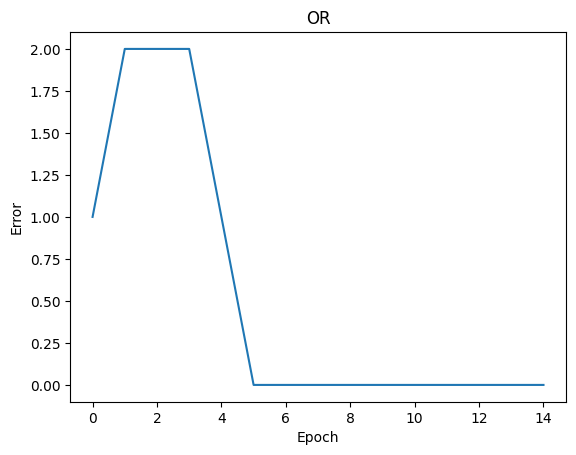

AND
[0, 0], 0
[0, 1], 0
[1, 0], 0
[1, 1], 1


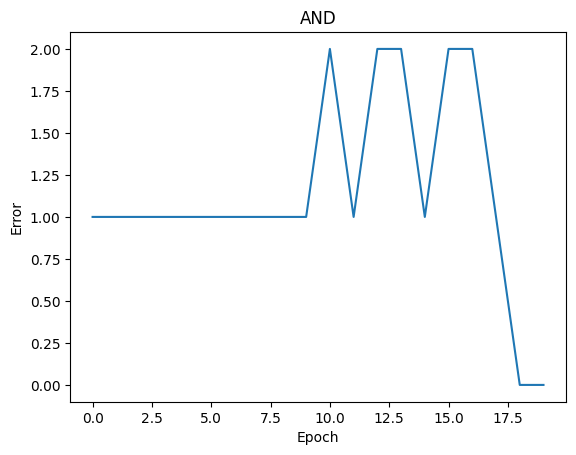

XOR
[0, 0], 1
[0, 1], 1
[1, 0], 0
[1, 1], 0


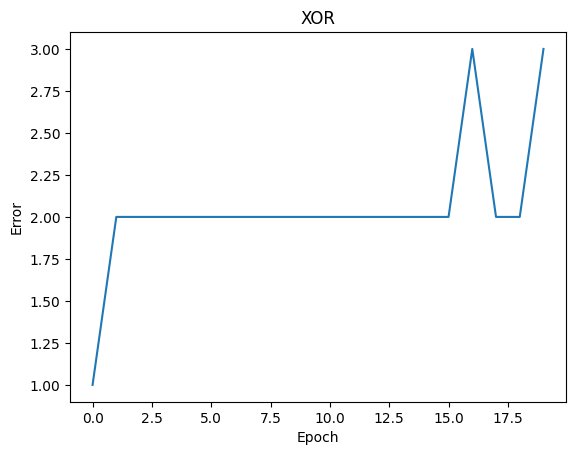

In [5]:
np.random.seed(5)
w = np.random.randn(2)
b = 0.0
l = 0.1
print("OR")
w, b, error = train(w, b, l, points, OR, 15)
for x in points:
    print(str(x) + ", " + str(predict(w, b, x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("OR")
plt.show()

w = np.random.randn(2)
b = 0.0
l = 0.1
print("AND")
w, b, error = train(w, b, l, points, AND, 20)
for x in points:
    print(str(x) + ", " + str(predict(w, b, x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("AND")
plt.show()

w = np.random.randn(2)
b = 0.0
l = 0.1
print("XOR")
w, b,error = train(w, b, l, points, XOR, 20)
for x in points:
    print(str(x) + ", " + str(predict(w, b, x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("XOR")
plt.show()

The first and second diagrams (OR and AND respectively) show that, as more epochs occur, the error aproaches 0. This means that the a single perceptron is sufficient to model the OR and AND gates. This makes sense, because these gates can be discriminated with a linear function. The XOR gate on the other hand ends up with an error of 4.00 after a couple of epochs. The perceptron could never model the XOR gate correctly. This shows that an XOR gate cannot be discriminated using a linear classifier and that we need a more complex model for it.

#### Question 2

We need 10 input neurons, as we have 10 features and each input is 1 feature.

#### Question 3

We receive 7 output neurons each one for seperate class as there are 7 output classes.

#### Question 4

We decide on 2 layers as it is some more complex classifier but it is not too much to overfit the data. First layer with 10 neurons and the second one with 7 neurons. We think it might be enough to plot the complexity of the classifier but not overfit on the data.

#### Question 5

We will use the softmax function for the output layer, since it works well for multiclass classification problems with mutually exclusive labels. For hidden layers we will use ReLU as it is simple and is going to be faster to compute in comparison to other more complex activation functions.

#### Question 6

We used online tool to create this diagram: https://alexlenail.me/NN-SVG/index.html
![network_diagram](network_diagram.png)


### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [6]:
class Linear:
    def __init__(self, in_features, out_features, weightInitialization, biasInitialization):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
        match weightInitialization:
            case "zeros":
                self.weight =np.zeros((in_features,out_features))
            case "randn":
                self.weight =np.random.randn(in_features,out_features)
            case "rand":
                self.weight =np.random.rand(in_features,out_features)
            case "he":
                self.weight =np.random.normal(0, 2.0/(in_features-1),(in_features,out_features))
            case "ones":
                self.weight = np.ones((in_features,out_features))
            case _:
                self.weight =np.random.randn(in_features,out_features)
        match biasInitialization:
            case "randn":
                self.bias =np.random.randn(out_features)
            case "rand":
                self.bias =np.random.rand(out_features)
            case "zeros":
                self.bias = np.zeros(out_features)
            case "ones":
                self.bias = np.ones(out_features)
            case _:
                self.bias =np.random.randn(out_features)

        self.cache = None
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.
        
        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        self.cache = x
        y = np.dot(x, self.weight) + self.bias

        return y
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        x = self.cache
        # x is 16 rows by 10 features
        # dupstream is 16 rows by 7 outputs
        # for the weight grad I need 10 by 7 size so I need to transpose x to achievie this size 
        self.weight_grad = np.matmul(x.T, dupstream)
        # because bias gradient is just 1 we do not need to multiply anything by the dubstream
        # however we need to add up all the bias from all items (rows) as every item contributed
        # 1 * its bias to the total error
        # we just need to sum all the rows into just 7 columns of the output classes
        self.bias_grad = np.sum(dupstream, axis=0)
        # returning downstream gradient which is upstream multiplied by local gradient with respect to output
        # which is escentially just the weights themselves
        return np.matmul(dupstream, self.weight.T)
    
    def set_weights(self, weights):
        self.weight = weights

    def set_bias(self, bias):
        self.bias = bias
    
# test if I can call it succesfully
lin = Linear(3,2, "rand", "rand")
print(lin.forward(np.array([
    [1,1,1]
    ])))

[[1.69878802 1.35855785]]


**Activation functions**

You also need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [7]:
class Activation:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        self.cache = x
        return np.maximum(0, x) # apply to all elements
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        # calculate dh / dz first to then return dl / dh * dh / dz = dl / dz
        derivativeHZ = self.cache > 0 # a mask with 0, 1 values is sufficient to represent a derivative of ReLU
        return dupstream * derivativeHZ

# small test
act = Activation()
assert((act.forward(np.array([-3, 0, 1])) == np.array([0, 0, 1])).all())
assert((act.backward(np.array([1, 0, -2])) == np.array([0, 0, -2])).all())

In [8]:
class Softmax:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = x
        exps = np.exp(x - np.max(x))    # we substract the maximum value to avoid overflow
        return exps / np.sum(exps, axis = 1, keepdims = True)
    
    def backward(self, dupstream):
        # matrix = np.zeros((self.cache.shape[0], self.cache.shape[0]))

        # for i in range(len(self.cache)):
        #     for j in range(len(self.cache)):
        #         if i == j:
        #             matrix[i][j] = self.cache[i] * (1 - self.cache[i])
        #         else: 
        #             matrix[i][j] = -self.cache[i] * self.cache[j]

        return dupstream


**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [9]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """

        current_input = x
        self.activations = []

        for i in range(len(self.layers) - 1):
            layer = self.layers[i]
            activation_function = Activation()
            current_input = activation_function.forward(layer.forward(current_input))
            self.activations.append(activation_function)

        layer = self.layers[len(self.layers) - 1]
        activation_function = Softmax()
        bob = layer.forward(current_input)
        current_input = activation_function.forward(bob)
        self.activations.append(activation_function)
        
        return current_input
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """

        current_gradient = dupstream

        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            activation_function = self.activations[i]
            current_gradient = layer.backward(activation_function.backward(current_gradient))

        return current_gradient
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """

        for layer in self.layers:
            layer.weight -= lr * layer.weight_grad
            layer.bias -= lr * layer.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [10]:
# Categorical cross-entropy loss function
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """
    n = len(y_true) # number of samples in the batch

    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15) # clip values so no divide-by-0 errors occur

    losses = []
    for i in range(n):
        losses.append(-np.log(y_pred_clipped[i, int(y_true[i] - 1)])) # calculate the negative log of the predicted probability of the correct label

    gradients = np.copy(y_pred_clipped)
    for i in range(n):
        gradients[i, int(y_true[i]) - 1] -= 1.0
    gradients /= n

    return np.mean(losses), gradients

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

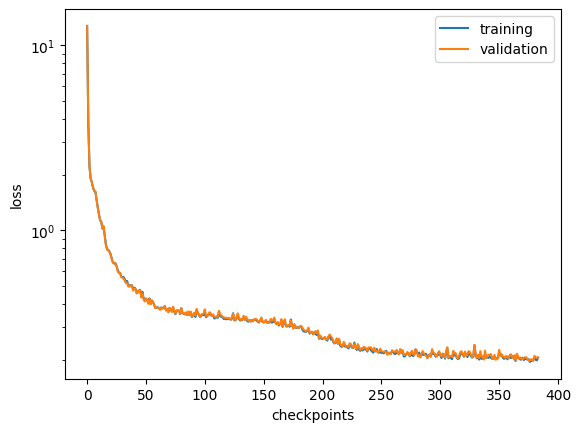

(np.float64(0.20461176389531294), np.float64(92.35993208828522))

In [10]:
def train(net, inputs, train, val, labels, criterion, lr=0.01, epochs=64, batch_size=16):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        train: indexes of training samples
        val: indexes of validation samples
        labels: labels. 
        criterion: loss function.
        lr: learning rate.
        epochs: number of epochs the training should run for
        batch_size: number of samples in one batch

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list conta8ining the accuracy at every optimizer step.
        train_loss: training loss at each checkpoint
        val_loss: validation loss at each checkpoint
    """
    s = int(len(train)/batch_size) # number of batches
    
    gradient_threshold = 1e-6 # threshold for gradient below which we should stop training

    checkpoint_training_loss = [] # loss for the training set at each checkpoint
    checkpoint_validation_loss = [] # loss for the validation set at each checkpoint

    losses = [] # loss at each optimizer step
    accuracies = [] # accuracy for the test set at each optimizer step

    for epoch in np.arange(1, epochs+1):
        np.random.shuffle(train) # shuffle the order of training samples
        batches = np.array_split(train, s) # split into batches

        max_gradient = 0 # maximum (absolute) gradient found in this epoch, if this value drops too low, we stop the training
        for i in range(s):
            input_batch = inputs[batches[i]]
            label_batch = labels[batches[i]]

            preds = net.forward(input_batch) # make a forward pass on one batch
            loss, grads = criterion(label_batch, preds) # evaluate

            net.backward(grads) # make a backward pass                
            net.optimizer_step(lr) # do one optimizer step

            max_gradient = np.max(np.absolute(grads)) # update the max gradient at this epoch

            losses.append(loss)
            # calculate the accuracy at this step by checking where the label which was given the highest probability matches the true label
            accuracies.append(np.sum(np.argmax(preds, axis=1) + 1 == label_batch)/len(label_batch))
            if i%(int(s/5)) == 0: # if we're at one of the checkpoints
                checkpoint_training_loss.append(
                    criterion(labels[train], 
                              net.forward(inputs[train])
                              )[0]
                              )
                checkpoint_validation_loss.append(
                    criterion(labels[val], 
                              net.forward(inputs[val])
                              )[0]
                              )
        if (max_gradient < gradient_threshold):
            break

    return losses, accuracies, checkpoint_training_loss, checkpoint_validation_loss

def display_training(train_loss, val_loss):
    plt.plot(train_loss, label="training")
    plt.plot(val_loss, label="validation")
    plt.xlabel("checkpoints")
    plt.ylabel("loss")
    plt.yscale("log")
    plt.legend()
    plt.show()

def evaluate(net, test_idx):
    loss = Loss(targets[test_idx], net.forward(features[test_idx]))[0]
    accuracy = np.sum(np.argmax(net.forward(features[test_idx]), axis=1) + 1 == targets[test_idx])/len(targets[test_idx])*100
    return loss, accuracy
    
layers = []
layers.append(Linear(10, 10, "rand", "rand"))
layers.append(Linear(10, 7, "rand", "rand"))
layers.append(Linear(7, 7, "rand", "rand"))
net = Network(layers)
losses, accuracies, train_loss, val_loss = train(net, features, train_idx, val_idx, targets, Loss, 0.013)
display_training(train_loss, val_loss)
evaluate(net, val_idx)

#### Question 7

We shuffle the data and split to 3 different sets namely: training, validation and test. This will make the unbiased estimate of performance as we will train on train data set only and the shuffling ensures the sets have similar distribution to each other. For reproducibility we use same seed for random shuffling so it always produces the same data sets.

#### Question 8

We evaluate the performance of the network by looking at its final accuracy. We will always label networks as 'better performant' than others if they have a higher accuracy, even if their final loss is worse. We think this is the most sensible approach because at the end of the day the robot will make desicions based on the classifications it made, not by the probability of the class being correct. So a network with better accuracy will perform better in practice.

#### Question 9

<!-- We decide to end the training when the gradient becomes small enough that it is almost zero. In our case, this threshold is (X1). This threshold is sensible because it is small enough so that, when we hit it, we are close enough to the actual local minima, but large enough so that it won't run indefinitely.  However, if after (X2) epochs we don't hit this threshold, we stop the training anyways. This is to make sure that the training doesn't run for ages (or even forever!). -->

After trying different values for different batch sizes, we found that if we take a batch size of 16 and a learning rate of 0.013, then the accuracy doesn't improve much after 64 epochs. We also found that this gives a good accuracy for the network of our initial guess from question 4 (around 92% accuracy). So after 16 epochs, we decide to stop training. We also stop when we our gradient is smaller than a certain threshold. In our case, that threshold is 1e-6. 

#### Question 10

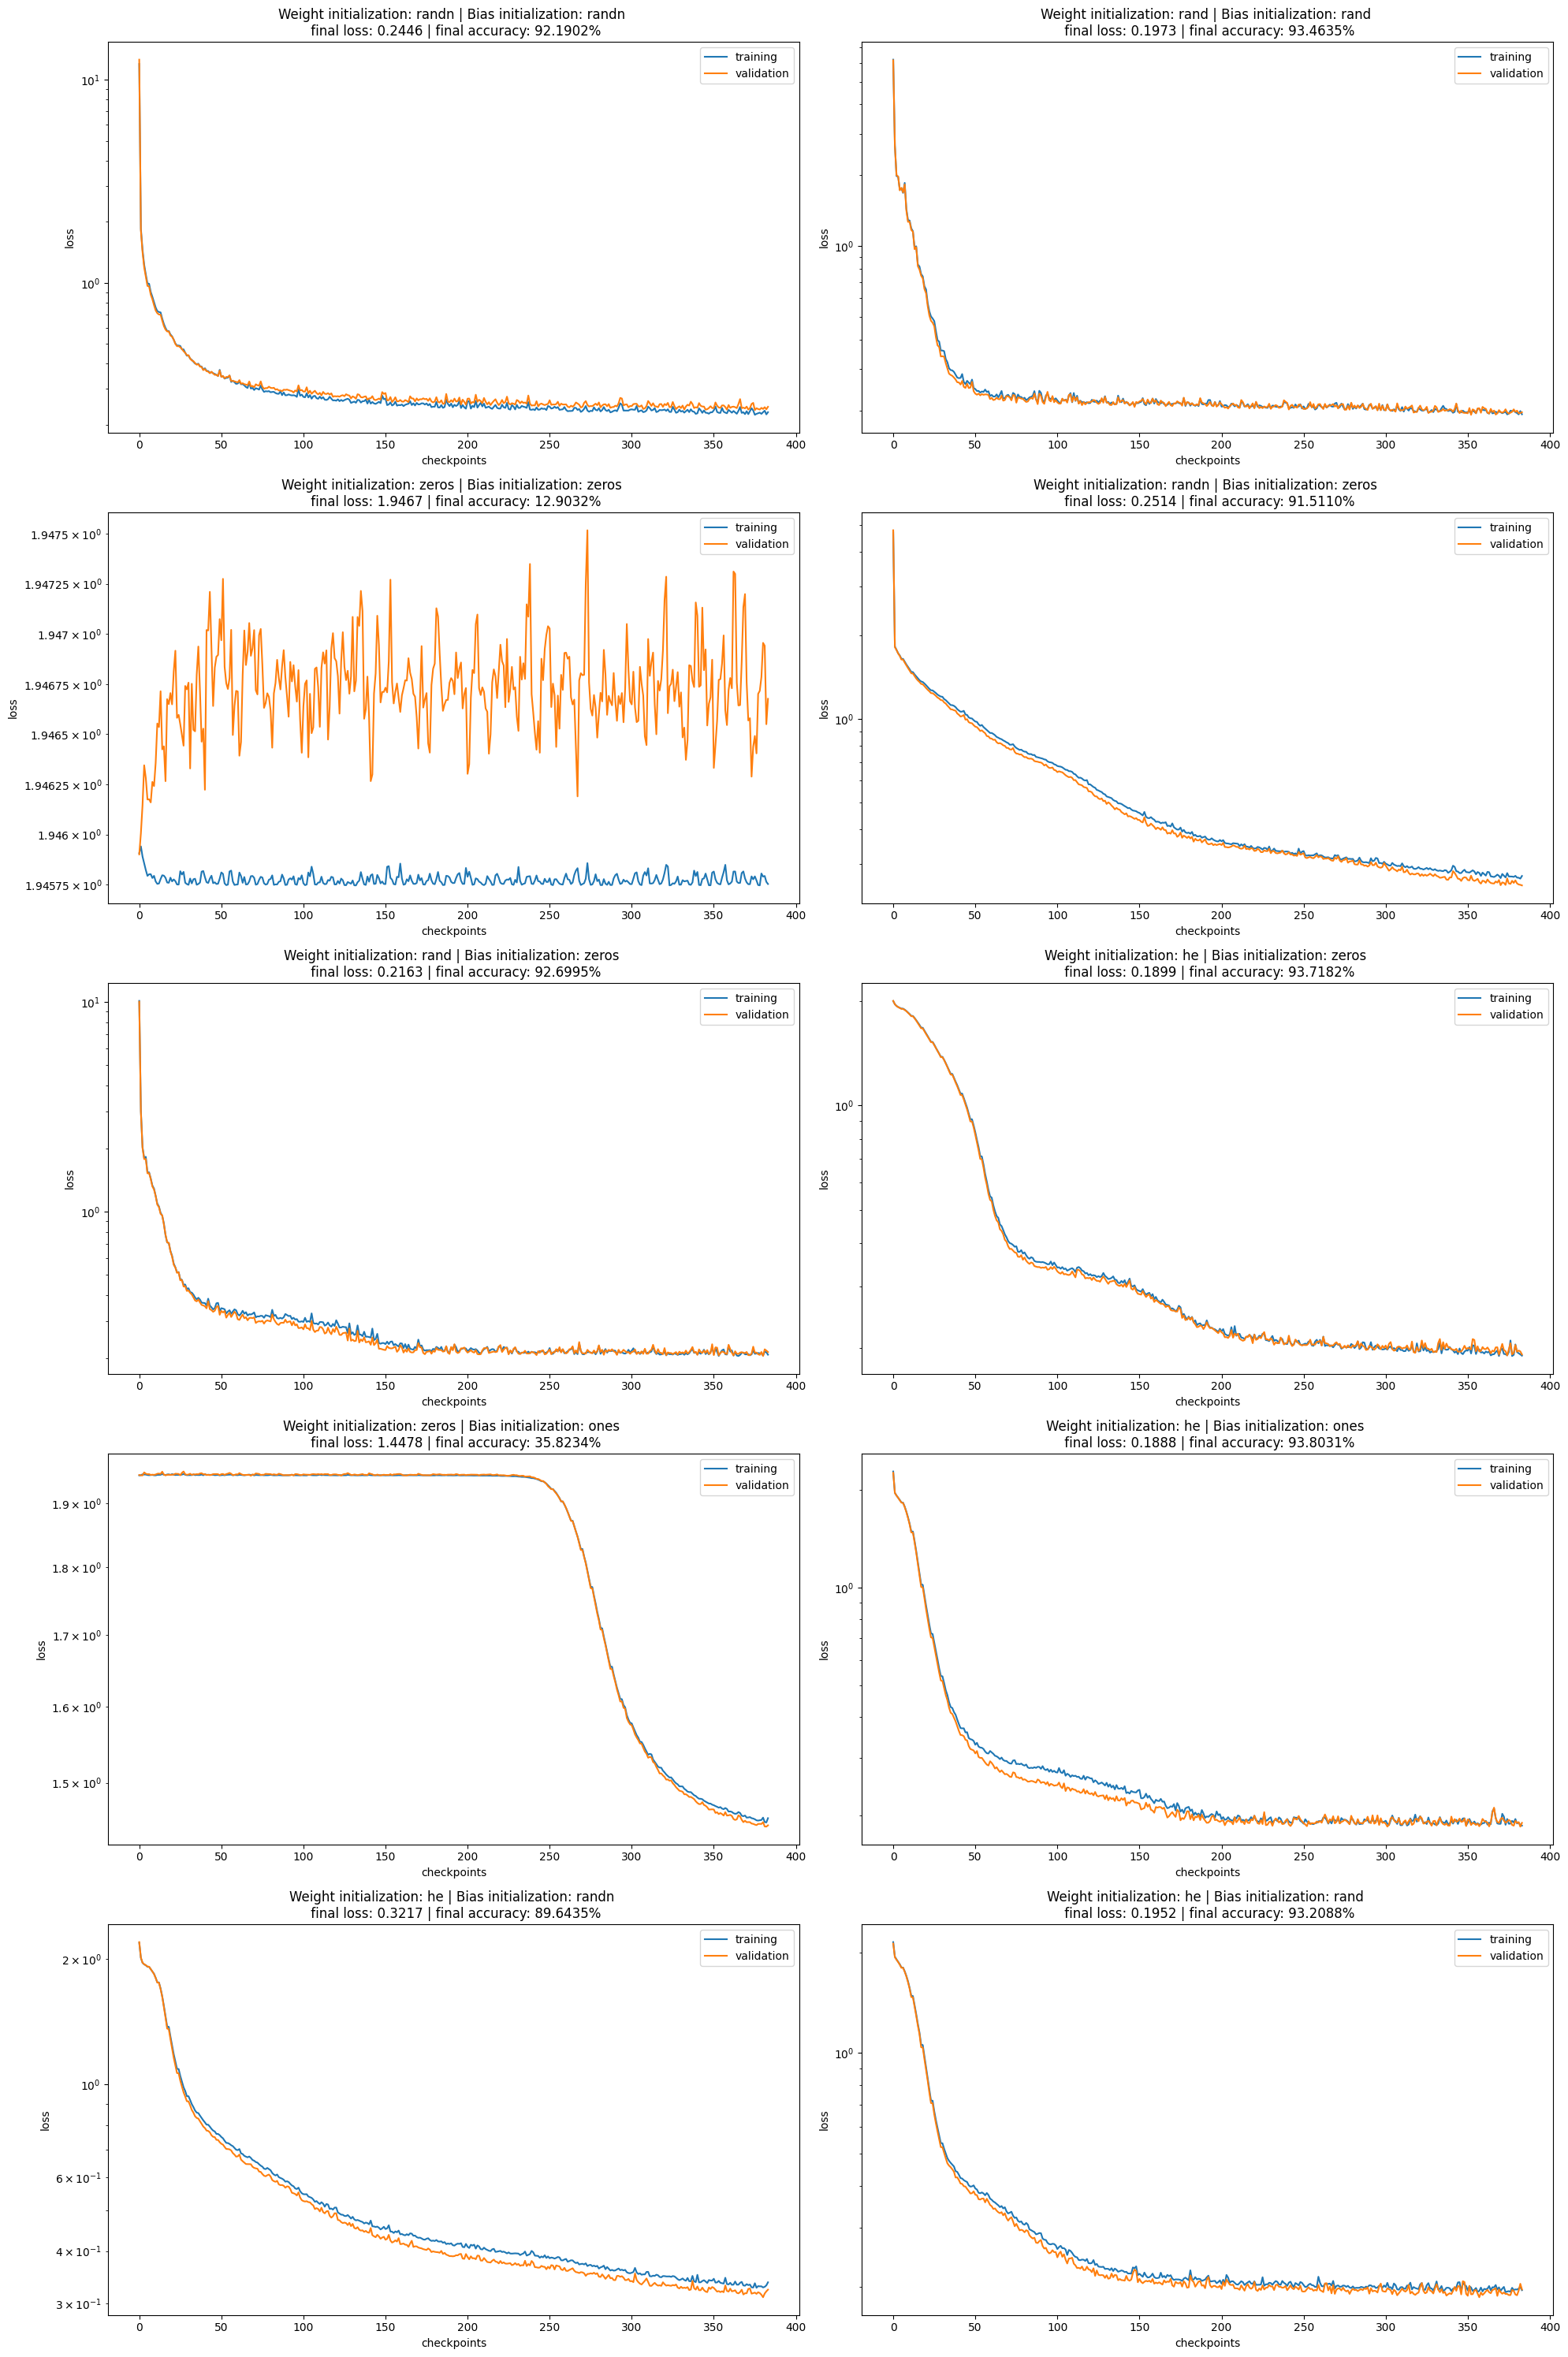

In [12]:
def add_to_subplot(train_loss, val_loss, ax):
    ax.plot(train_loss, label="training")
    ax.plot(val_loss, label="validation")
    ax.set_xlabel("checkpoints")
    ax.set_ylabel("loss")
    ax.set_yscale("log")
    ax.legend()

fig, axes = plt.subplots(5, 2, figsize=(20, 30))
axes = axes.flatten()

weightInitializations = ["randn", "rand","zeros", "randn", "rand", "he", "zeros", "he", "he", "he"]
biasInitializations = ["randn", "rand","zeros", "zeros","zeros", "zeros", "ones", "ones","randn", "rand"]

for i in range(10):
    layers = []
    layers.append(Linear(10, 10, weightInitializations[i], biasInitializations[i]))
    layers.append(Linear(10, 7, weightInitializations[i], biasInitializations[i]))
    layers.append(Linear(7, 7, weightInitializations[i], biasInitializations[i]))

    net = Network(layers)
    
    losses, accuracies, train_loss, val_loss = train(net, features, train_idx, val_idx, targets, Loss, 0.013)
    loss, accuracy = evaluate(net, val_idx)
    axes[i].set_title(f'Weight initialization: {weightInitializations[i]} | Bias initialization: {biasInitializations[i]} \n final loss: {loss:.4f} | final accuracy: {accuracy:.4f}%')
    add_to_subplot(train_loss, val_loss, axes[i])

    

plt.tight_layout()
plt.show()
    

As we can see in the 3rd and 7th graph which start respectively with zeros for both weight and biases and zeros for weights and 1's for biases. We can see that the error loss perform way worse than for other types of initializations. This is expected as starting with weigths that are zeros effectively make them stuck at value 0 which means the weights do not have any contribution to the network and only the biases can contribute to it, however it is not enough for the network to perform well that is why the errors jump randomly and do not approach smaller and smaller errors on each epochs. As for other initializations it does not matter that much which one do we choose as all perform almost the same however the standard for ReLU activation is "he" initialization and zeros for biases so we will pick that one. Also it has one of the lowest loss and highest accuracy in comparison to others(though not that significant)

### 1.4 Optimization

#### Question 11

In [13]:
neurons = [7, 10, 15, 20, 30] # possible numbers of neurons

accs = [] # accuracies of each model

for i in neurons:
    for j in neurons:
        acc = 0
        for k in range(5): # train the network 5 times for each combination and take the average
            layers = []
            layers.append(Linear(10, i, "he", "zeros"))
            layers.append(Linear(i, j, "he", "zeros"))
            layers.append(Linear(j, 7, "he", "zeros"))
            net = Network(layers)
            train(net, features, train_idx, val_idx, targets, Loss, 0.013)
            acc += evaluate(net, val_idx)[1]
        acc /= 5
        accs.append(round(acc,2))

fig, ax = plt.subplots()
accs = np.array(accs).reshape((len(neurons), len(neurons)))
im = ax.imshow(accs)

ax.set_xticks(range(len(neurons)), labels=neurons, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(neurons)), labels=neurons)

for i in range(len(neurons)):
    for j in range(len(neurons)):
        text = ax.text(j, i, accs[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


KeyboardInterrupt: 

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.5 Evaluation

#### Question 13

In [ ]:
final_net = Network()
loss, val_acc = evaluate(final_net, val_idx)
loss, test_acc = evaluate(final_net, test_idx)

print("The final accuracy of the network on the test set: " + round(test_acc, 2) + "%")
print("The final accuracy of the network on the validation set: " + round(val_acc, 2) + "%")

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 14

In [22]:
from sklearn.metrics import confusion_matrix

predicted = np.argmax(net.forward(features[test_idx]), axis=1) + 1
actual = targets[test_idx]

matrix = confusion_matrix(actual, predicted)
print(matrix)

best_class = 0
worst_score = 1.0
worst_class = 0
best_score = 0.0
for i in range(7):
    row = matrix[i]
    score = row[i] / (np.sum(row))
    if(best_score < score):
        best_score = score
        best_class = i + 1
    if(worst_score > score):
        worst_score = score
        worst_class = i + 1
print("Best score for class " + str(best_class) + " with recall: " + str(best_score))
print("Worst score for class " + str(worst_class) + " with recall: " + str(worst_score))

[[134   0   6   6   4   1   1]
 [  1 144   0   0   0   3   3]
 [  3   0 178   0   8   0   4]
 [  3   0   2 156   2   1   5]
 [  5   2   5   2 147   9   0]
 [  1   3   2   2   5 155   4]
 [  1   4   3   3   0   7 154]]
Best score for class 2 with recall: 0.9536423841059603
Worst score for class 5 with recall: 0.8647058823529412


This confusion matrix showcases how many samples were assigned to each class based on their true class. The rows represent the true classes, while the columns represent the predicted classes. Therefore everything on the diagonal is a correct classification, while all other data represents the number of misclassified samples. Our model mostly assigns the correct class in each case and the recall ranges from 86% to 95%. We can expect that our model will perform best for class 2 and the worst for class 5. We may also expect that the most mistakes will be made by mistaking class 5 with class 6 (9 mistakes) or class 3 with class 5 (8 mistakes). Similarly we may see that many classes are unlikely to be mistaken with each other if there are 0 misclassifications.

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.6 Scikit-learn

#### Question 16

#### Question 17

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.7 Reflection

#### Question 18

Example: job applications for a role like a pilot which is generally more occupied by males. System could be learned on the data which has more males than females resulting in bias towards choosing men as good pilot candidates not caring about real competitions of a person. Harmful consequences of that are that women which have same or better qualifications than some men can be rejected and those men could be accepted solely because system would be biased toward the male gender. This is unfair for women that apply for certain job and less safe for people flying as less competent people could be chosen.

#### Question 19

<!-- The problem is that the data is that the data is biased towards male applicants. Just hiding the gender feature isn't enough to mitigate this bias. This is because other features might still be correlated to the gender. For example, male applicants can have more years of experience on average. So we nee -->

First thing we can do to mitigate harm produced by unjust classification is to force a minimum amount of accepted applicants to be female. For example, if there are ten spots open to apply for the job, then we will only hire the top 5 men the classifier picked and the top 5 women the classifier picked.
Second thing we can do is to use a different threshold for each gender in the classifier. For example, let's say that the classifier assigns a number from 0 to 1 to each applicant and if it's over 0.8, then the applicant gets hired. Instead of having the same threshold of 0.8 for each applicant, male applicants would have a threshold of 0.85 and women a threshold of 0.75.

These solutions help mitigate harm done by unjust classification, but that doesn't mean they solve them entirely. The first solution can lead to an unoptimal application acceptance: maybe for some arbitrary hiring season, if the top 6 men and top 4 women would actually have been the best choice, but the model would never be able to pick that. For the second solution, we can try to tune the threshold so that men and women will have a more equal oppurtunity, but it's not like we have an algorithm that finds this 'perfect' threshold. At the end of the day these threshold are picked by humans, and these might still be biased.  

### 1.8 Pen and paper

#### Question 20

After 2x2 max pooling applied:
$$
\begin{bmatrix}
2 & 6 & 6 & 2 \\
6 & 8 & 8 & 4 \\
6 & 8 & 8 & 4 \\
2 & 4 & 4 & 2 
\end{bmatrix}
$$

Sharpen kernel applied: 

$$
\begin{bmatrix}
12 & 14 \\
14 & 16 \\
\end{bmatrix}
$$

The final answer:
$$x_1 = 12+14 = 26$$
$$x_2 = 14+16 = 30$$

#### Question 21

We ignore the bias terms in the calculation because they are equal to $0$

$$x1 = 26$$
$$x2 = 30$$


$$z1 = ReLU(1.5 \cdot 26 - 2 \cdot 30) = 0$$
$$z2 = ReLU(30 - 26) = 4$$

$$y = ReLU(0 + 1.5 \cdot 4) = 6 $$


### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

</div>

### References

Tool we used to create diagram for question 6: https://alexlenail.me/NN-SVG/index.html